In [1]:
# Add dependencies
# Import the random module.
import random
# Import the NumPy module - has a built-in random module and supplements 
# the built-in Python random module.
import numpy as np
# Import timeit - This test how long a piece of code or function takes to 
# run (complete).
import timeit
# Import Pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and datetime module from the datetime library.
import time 
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

599

In [5]:
# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Each time we reference the city in the code, we need to use the indexing
# on the cities list.  This will cause programming errors when building the
# city_url because it adds the index, not the city name, to the city_url.  
# to fix this issue, create another for loop to get the city from the cities
# list.  Instead of using 2 for loops, use the enumerate() method as an 
# alternative way to iterate through the list of cities and retrieve both
# the index, and the city from the list.  Syntax for the enumerate() 
# method is for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | salalah
Processing Record 4 of Set 1 | watsa
Processing Record 5 of Set 1 | toora-khem
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | shieli
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | ha giang
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | koulikoro
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | songadh
Processing Record 19 of Set 1 | fuling
Processing Record 20 of Set 1 | nador
Processing Record 21 of Set 1 | utiroa
City not found. Skipping...
Proces

Processing Record 34 of Set 4 | shingu
Processing Record 35 of Set 4 | nemuro
Processing Record 36 of Set 4 | pacific grove
Processing Record 37 of Set 4 | kouqian
Processing Record 38 of Set 4 | fortuna
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | ouadda
Processing Record 44 of Set 4 | abu samrah
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | los aquijes
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | pointe michel
Processing Record 50 of Set 4 | tabuk
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | xining
Processing Record 4 of Set 5 | barbar
City not found. Skipping...
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | lakes entrance
Processing Record 7 of Set 5 | ling

Processing Record 23 of Set 8 | ahipara
Processing Record 24 of Set 8 | kavieng
Processing Record 25 of Set 8 | akalkot
Processing Record 26 of Set 8 | komsomolskiy
Processing Record 27 of Set 8 | paciran
Processing Record 28 of Set 8 | posse
Processing Record 29 of Set 8 | alihe
Processing Record 30 of Set 8 | samarai
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | kismayo
Processing Record 33 of Set 8 | harper
Processing Record 34 of Set 8 | saint-denis
Processing Record 35 of Set 8 | klaksvik
Processing Record 36 of Set 8 | hillsborough
Processing Record 37 of Set 8 | santiago de las vegas
Processing Record 38 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 8 | makakilo city
Processing Record 40 of Set 8 | crotone
Processing Record 41 of Set 8 | pottsville
Processing Record 42 of Set 8 | cienaga
Processing Record 43 of Set 8 | outjo
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | lorengau
Processing Record 46 o

Processing Record 11 of Set 12 | serro
Processing Record 12 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 13 of Set 12 | kefamenanu
Processing Record 14 of Set 12 | yambio
Processing Record 15 of Set 12 | camacha
Processing Record 16 of Set 12 | koprivnica
Processing Record 17 of Set 12 | chicama
Processing Record 18 of Set 12 | kota belud
Processing Record 19 of Set 12 | kieta
Processing Record 20 of Set 12 | victor harbor
Processing Record 21 of Set 12 | gogrial
Processing Record 22 of Set 12 | sidi ali
Processing Record 23 of Set 12 | kesan
Processing Record 24 of Set 12 | martapura
Processing Record 25 of Set 12 | haibowan
City not found. Skipping...
Processing Record 26 of Set 12 | nicoya
Processing Record 27 of Set 12 | ust-koksa
Processing Record 28 of Set 12 | tihuatlan
Processing Record 29 of Set 12 | nanortalik
Processing Record 30 of Set 12 | oneonta
Processing Record 31 of Set 12 | zeya
Processing Record 32 of Set 12 | ixtapa
Processing Record 33 of Set

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,70.84,78,5,7.49,CV,2022-04-04 22:40:37
1,Yellowknife,62.4560,-114.3525,41.52,48,75,13.80,CA,2022-04-04 22:40:37
2,Salalah,17.0151,54.0924,78.89,83,40,1.14,OM,2022-04-04 22:40:37
3,Watsa,3.0372,29.5355,64.74,92,63,2.68,CD,2022-04-04 22:40:38
4,Toora-Khem,52.4675,96.1100,35.04,99,100,2.44,RU,2022-04-04 22:40:38
5,Dikson,73.5069,80.5464,2.88,86,55,14.09,RU,2022-04-04 22:40:38
6,Cape Town,-33.9258,18.4232,62.89,88,75,12.66,ZA,2022-04-04 22:36:27
7,Shieli,44.1667,66.7500,64.20,45,0,10.78,KZ,2022-04-04 22:40:39
8,Port Alfred,-33.5906,26.8910,60.19,88,0,3.00,ZA,2022-04-04 22:40:39
9,Khatanga,71.9667,102.5000,-28.89,100,44,4.18,RU,2022-04-04 22:40:40


In [8]:
# Convert the order of the columns in the DataFrame to be in the following 
# order: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, & 
# Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
# Assign city_data_df = city_data_df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-04-04 22:40:37,14.8961,-24.4956,70.84,78,5,7.49
1,Yellowknife,CA,2022-04-04 22:40:37,62.4560,-114.3525,41.52,48,75,13.80
2,Salalah,OM,2022-04-04 22:40:37,17.0151,54.0924,78.89,83,40,1.14
3,Watsa,CD,2022-04-04 22:40:38,3.0372,29.5355,64.74,92,63,2.68
4,Toora-Khem,RU,2022-04-04 22:40:38,52.4675,96.1100,35.04,99,100,2.44
5,Dikson,RU,2022-04-04 22:40:38,73.5069,80.5464,2.88,86,55,14.09
6,Cape Town,ZA,2022-04-04 22:36:27,-33.9258,18.4232,62.89,88,75,12.66
7,Shieli,KZ,2022-04-04 22:40:39,44.1667,66.7500,64.20,45,0,10.78
8,Port Alfred,ZA,2022-04-04 22:40:39,-33.5906,26.8910,60.19,88,0,3.00
9,Khatanga,RU,2022-04-04 22:40:40,71.9667,102.5000,-28.89,100,44,4.18


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

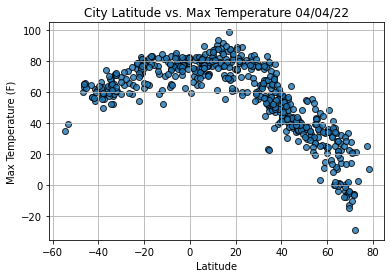

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

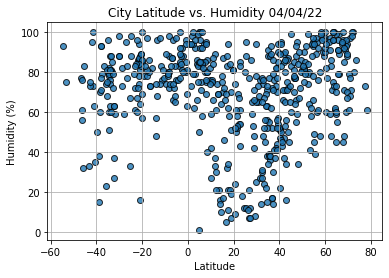

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

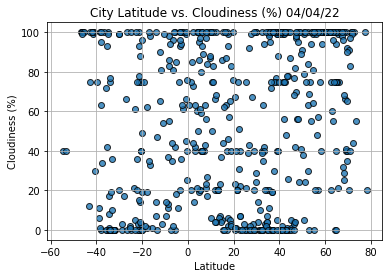

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

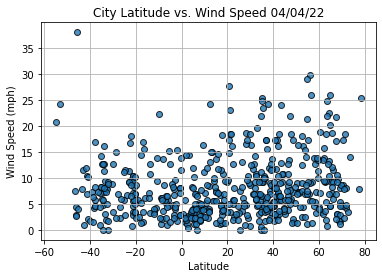

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()